# Incertitudes sur une grandeur composée par méthode Monte Carlo
---

## Introduction

Lorsqu'on mesure expérimentalement une grandeur $b$ avec une incertitude $\Delta b$, on souhaite souvent en déduire une grandeur $a$ via une expression théorique 

$$ a = f(b) $$

**Quelques exemples :**
- on mesure une distance $d$ en optique géométrique et on souhaite en déduire une focale $f'$ (méthode de Bessel, TP 1) selon l'expression théorique
$$ f' = \frac{D^2 - d^2}{4\, D} $$
- on mesure un angle $\alpha$ au goniomètre et on veut en déduire une longueur d'onde $\lambda$ selon l'expression
$$ \lambda = \frac{a\, \sin \theta_{\lambda,p}}{p} $$

Évidemment, l'incertitude $\Delta b$ sur $b$ se **propage par composition** par la fonction $f$ en une incertitude $\Delta a$ sur $a$. Comment obtenir cette incertitude $\Delta a$?

## Principe de la méthode Monte-Carlo

L'idée de la méthode Monte Carlo est la suivante : à partir de notre incertitude $\Delta b$ on engendre un grand nombre $N$ de valeurs aléatoires dans l'intervalle

$$ [b - \Delta b,\, b + \Delta b] $$

Notons $b_i$ ces valeurs. Pour chacun des $b_i$ on déduit $a_i = f(b_i)$. Cela conduit à $N$ valeurs $a_i$ pour la grandeur $a$. L'incertitude sur $a$ est alors évaluée comme étant l'écart-type de la distribution de ces $a_i$.


## Mise en place numérique

Dans le code minimal ci-dessous.

1. On donne la valeur mesurée $b$
2. On donne l'incertitude $\Delta b$ associée à cette mesure
3. On définit la loi théorique $f$ reliant $b$ à $a$
4. On définit le nombre de valeurs souhaitées.
5. On crée un tableau de valeur aléatoire de $a$
6. On en prend la moyenne et l'écart-type



## Code minimal

In [7]:
import numpy as np

b = 1
Db = 0.1
f = lambda x : 1 / x
N = 1000

a = [ f( np.random.uniform(b - Db, b+Db) ) for i in range(N) ]

print( "a = " + str(round(np.mean(a),3)) + " +/- " + str(round(np.std(a),3)) )

a = 1.005 +/- 0.059


## Représentations graphiques


On peut demander à voir la distribution des valeurs $a_i$ sous forme d'histogramme.

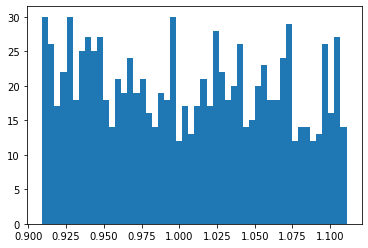

In [9]:
from matplotlib import pyplot as plt

plt.hist(a, bins=50)
plt.show()

## Commentaires

On peut prendre une distribution gaussienne (plutôt que la distribution uniforme) pour les valeurs de $b$. Cette distribution s'appelle aussi une distribution **normale** en statistique.

In [11]:
a = [ f( np.random.normal(b, Db) ) for i in range(N) ]
print( "a = " + str(round(np.mean(a),3)) + " +/- " + str(round(np.std(a),3)) )

a = 1.011 +/- 0.106


# À vous de jouer

Écrivez un code qui donne l'incertitude sur $a$ à partir de la mesure de 

$$ b = 45,3 \pm 0,5 $$

et 

$$ c = 12 \pm 1 $$

sachant que 

$$ a = \frac{b^3}{c} $$